In [3]:
import matplotlib.pyplot as plt
from Qlearning import *
from valueIteration import *
from runBicycleTest import *
from LinearController import getLQRGains
import time
import sys
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
state_flag1 = 6
state_flag2 = 7
figObject = None
simulation_duration = 5
make_graph = True
v = 0.5

In [4]:
# name = "VI_r14_s16_a1_30episodes"
# name = "VI_r14_a1_s16_v1_50episodes"

name = "VI_r14_a1_s16_v0.5_100episodes"
VI_model = ValueIteration(state_grid_flag = 16, action_grid_flag = 1,
reward_flag = 14, Ufile = "modelsB/"+name, use_only_continuous_actions = False,
remake_table = False, step_table_integration_method = "fixed_step_RK4",
USE_LINEAR_EOM = False, name = name, timestep = 1/50, v = v)

# VI_model.train( gamma = 1, num_episodes = 300, convergence_threshold = 0.9995,
#        interpolation_method = "linear", use_continuous_actions = False, vectorize = None)

VI_model.init_controller(use_continuous_actions = True,
  use_continuous_state_with_discrete_actions = True,
  controller_integration_method = "fixed_step_RK4",
  use_regression_model_of_table = False)

Initializing VI model
Using State Grid Flag 16
Loading step_table modelsB/VI_r14_a1_s16_v0.5_100episodes.csv from file
Initialized VI Model modelsB/VI_r14_a1_s16_v0.5_100episodes.csv in 175.69730019569397sec


lqrd_0.5m_s_4_8 success: True, cumulative reward:5009.171940272909,  time in simulation: 5.019999999999981
Tested lqrd_0.5m_s_4_8 in 0.1319568157196045 sec of computer time
graphing: lqrd_0.5m_s_4_8
lqrd_0.5m_s_5 success: False, cumulative reward:1006.9628437705757,  time in simulation: 1.0000000000000004
Tested lqrd_0.5m_s_5 in 0.024098873138427734 sec of computer time
graphing: lqrd_0.5m_s_5


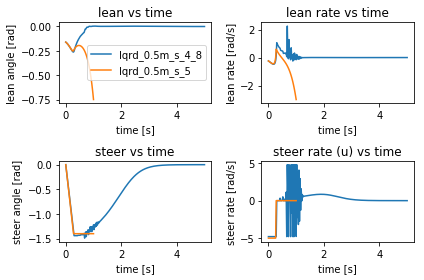

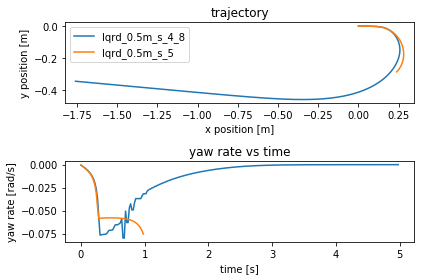

In [12]:
figObject = None
starting_state3 = [-0.16, -0.24, 0.0]

LQR_gains = getLQRGains("lqrd_0.5m_s")
(_, figObject) = runBicycleTest(None,
controller = LinearController.LinearController(LQR_gains),
name = "lqrd_0.5m_s_4_8", reward_flag = 14,
simulation_duration = simulation_duration,
isGraphing  = make_graph, figObject = figObject, starting_state3 = starting_state3,
USE_LINEAR_EOM = False, timestep = 1/50, v = v,   max_steer_rate = 4.8)


LQR_gains = getLQRGains("lqrd_0.5m_s")
(_, figObject) = runBicycleTest(None,
controller = LinearController.LinearController(LQR_gains),
name = "lqrd_0.5m_s_5", reward_flag = 14,
simulation_duration = simulation_duration,
isGraphing  = make_graph, figObject = figObject, starting_state3 = starting_state3,
USE_LINEAR_EOM = False, timestep = 1/50, v = v,   max_steer_rate = 5)



plt.show()



plt.close("all")
